# グラフ分類 チュートリアル

[Graph Classification Tutorial — DGL 0.4 documentation](https://docs.dgl.ai/tutorials/basics/4_batch.html)

このチュートリアルでは、可変量・可変形の複数グラフを DGL でバッチ処理する方法を学びます。
同時に、簡単なグラフ分類タスクのためのグラフニューラルネットワークの構築も実例します。

**グラフ分類 (graph classification)** は、次のような多くの分野で重要な問題です。

- バイオインフォマティクス
- ケモインフォマティクス
- ソーシャルネットワーク分析
- アーバンコンピューティング
- サイバーセキュリティ

グラフニューラルネットワークをグラフ分類問題に適用する試みは、近年非常に盛んに行われています。この例としては、以下のような文献が挙げられます。

- [[1806.08804] Hierarchical Graph Representation Learning with Differentiable Pooling](https://arxiv.org/abs/1806.08804)
    - NeurIPS 2018
    - 既存手法では、グラフ埋め込み後のグラフの代表特徴量を生成するフェーズで、すべてのノードが均一に扱われてしまうことでグラフの階層的な構造を抽出できていなかった
    - グラフ特徴量をソフト クラスタリングのように集約する手法 DIFFPOOL を提案
- [[1811.01287] Towards Sparse Hierarchical Graph Classifiers](https://arxiv.org/abs/1811.01287)
    - NeruIPS 2018: Relational Representation Learning Workshop
    - DiffPool ではクラスタリングのコストが非常に高く、メモリの消費量も膨大なため、大規模グラフには適用できなかった
    - そこで、1) クラスタリングではなく Graph U-Net のような drops 構造による階層的集約、および 2) 集約階層ごとの "階層ベクトル" を readout する工夫で大幅な計算効率化を図った
- [[1811.09595] Spectral Multigraph Networks for Discovering and Fusing Relationships in Molecules](https://arxiv.org/abs/1811.09595)
    - 2018
    - 複数種類のエッジがある (heterogeneous な) マルチグラフに対して、Chebyshev GCN (ChebNet) の多項式をを 2 次元に拡張することで、学習可能とした
- [[1901.01343] Graph Neural Networks with convolutional ARMA filters](https://arxiv.org/abs/1901.01343)
- [[1901.01484] LanczosNet: Multi-Scale Deep Graph Convolutional Networks](https://arxiv.org/abs/1901.01484)
- [Graph U-Net | OpenReview](https://openreview.net/forum?id=HJePRoAct7)

## 簡単なグラフ分類タスク

このチュートリアルでのサンプルタスクの目的は、以下の 8 種類のグラフを分類することです。

![](https://s3.us-east-2.amazonaws.com/dgl.ai/tutorial/batch/dataset_overview.png)

`data.MiniGCDataset` を利用することで、グラフを生成しましょう。

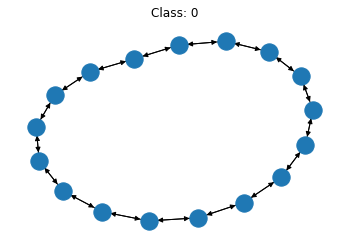

In [1]:
from dgl.data import MiniGCDataset
import matplotlib.pyplot as plt
import networkx as nx
# A dataset with 80 samples, each graph is
# of size [10, 20]
dataset = MiniGCDataset(80, 10, 20)
graph, label = dataset[0]
fig, ax = plt.subplots()
nx.draw(graph.to_networkx(), ax=ax)
ax.set_title('Class: {:d}'.format(label))
plt.show()